# Forest Fire Spreading 


## Background

Wildfires are one of the most harmful phenomena in Chile burning thousands of forest hectares every year destroying significant flora and fauna, and affecting the air, water cycles, and the ecosystem. Wildfires start by varied reasons, ranging from reckless human behavior to extreme weather and environmental conditions

## Main Goal

Build a mathematical model based on SPDE qualitatively realistic with the phenomenon behaviour. 

## Objectives
1. Start with an agent based model, working with the weather conditions and initial fires focus. 
2. Get a continuous model based on SPDE from the ABM.
3. Assess wind relevance to the model.

## Cellular Automata

Formally, a cellular automaton could be represented by the 4-tuple $(Z,S,N,f)$ where:

* $Z$ is the finite or infinite lattice
* $S$ is a finite set of cell states or values
* $N$ is the finite neighborhood
* $f$ f is the local transition function defined by the transition table or the rule

The lattice is a finite or infinite discrete regular grid of cells on a finite number of dimensions. Each cell is defined by its discrete position (an integer number for each dimension) and by its discrete value (one of a finite set of integers). Time is also discrete. The future state of a cell (time $t+1$) is a function of the present state (time $t$) of a finite number of cells surrounding the observed cell called the neighborhood.

### Lattice, cell and configuration
### Neighborhood

For a 2D CA we could use:

#### von Neumann neighborhood

It is the smallest symmetric 2D aligned neighborhood usually described by directions on the compass $N=\{N,W,C,E,S\}$ sometimes the central cell is omitted. Formally the von Neumann neighborhood is the set of neighbors

\begin{equation}
    n_{xy}=\lbrace \{0,-1\},\{-1,0\},\{0,0\},\{+1,0\},\{0,+1\}\rbrace 
\end{equation}

or 

\begin{equation}
     n_{(x_0,y_0)}^v=\{(x,y):|x-x_0|+|y-y_0|\leq r\}, 
\end{equation}

for a range $r$.

#### Moore neighborhood

Is a simple square (usually 3×3 cells) with the output cell in the center. Usually cells in the neighborhood are described by directions on the compass $N=\{NW,N,NE,W,C,E,SW,S,SE\}$ sometimes the central cell is omitted. Formally the Moore neighborhood is the set of neighbors

\begin{equation}
    n_{xy}=\lbrace \{-1,-1\},\{0,-1\},\{1,-1\},\{-1,0\},\{0,0\},\{+1,0\},\{-1,+1\},\{0,+1\},\{1,+1\}\rbrace
\end{equation}

or 

\begin{equation}
    n_{(x_0,y_0)}^M=\{(x,y):|x-x_0|\leq r,|y-y_0|\leq r\},
\end{equation}

for a range $r$.

### Local transition function

The local transition function 

\begin{equation}
    f:S^{N\times M}\mapsto S
\end{equation}

calculates the value of a single future cell $c_{xy}$ from the neighborhood of the observed cell in the present.

\begin{equation}
    c_{xy}^{t+1}=f(n_{xy}^{t})
\end{equation}

### Global transition function

The global dynamics of CA are described by the global transition function
\begin{equation}
    F:S^{Z\times Z}\mapsto S^{Z\times Z}
\end{equation}

$F$ translates the current (present) configuration $C^{t}$ into the next (future) configuration $C^{t+1}$.

\begin{equation}
    C^{t+1}=F\left(C^{t}\right)
\end{equation}

The global transition function $F$ is defined by the local transition function $f$ as

\begin{equation}
    F(\dots c_{a\in n_{xy}} \dots) = \dots f(n_{xy})
    %F(\dots c_{x-1,y-1}c_{x-1,y}c_{x,y-1}c_{xy}c_{x,y+1}c_{x+1,y}c_{x+1,y+1}\dots )=\dots f(n_{x-1,y-1})f(n_{x-1,y})f(n_{x,y-1})f(n_{xy})f(n_{x,y+1})f(n_{x+1,y})f(n_{x+1,y+1})\dots
\end{equation}

<!--
### Finite lattices and lattice boundaries

Infinite cellular automata have no boundary, so its boundary description $B$ is omitted. But there is no way to simulate an infinite system using a finite system. The simulation must focus on a finite part of length $l$.

The neighborhood used in the local transition function oversteps the lattice boundary for $r_{L}, r_{R}, r_{T}, r_{B}$ cells at the left, right, top and bottom respectively.

There are two common solutions to the overstepping problem: the lattice is wrapped into a circle (torus for 2D CA) the values of the overstepping parts of the neighborhood are defined explicitly as the boundary $B$

#### Cyclic boundaries

Cyclic boundaries are frequently used as there is no need to explicitly define the boundary value and no external information is introduced into the CA that could otherwise cause interference at the boundaries.

The state of a finite lattice cellular automata is a configuration in the lattice $S^{Z\times Z}$, where $Z$ is a cyclic group of integers modulo $N(\{0,1,...,N-1\})$

{\displaystyle C=c_{0}c_{1}\dots c_{x-1}c_{i}c_{x+1}\dots c_{N-1}\qquad c\in S} {\displaystyle C=c_{0}c_{1}\dots c_{x-1}c_{i}c_{x+1}\dots c_{N-1}\qquad c\in S}
The cyclic position index is calculated as

{\displaystyle x_{\circ }=x\mod N\qquad x\leq 0\vee x>N} {\displaystyle x_{\circ }=x\mod N\qquad x\leq 0\vee x>N}

#### Explicitly defined boundaries

The lattice boundary (left and right)
Explicitly defined boundaries are less common as the simple constant values are useful only for CA where we observe events on a quiescent background with period 1. The boundary can be defined as a single set (the left and the right part combined) of cell values of length {\displaystyle k-1} k-1 (there is no boundary cell with index 0)

{\displaystyle B=\{b_{-k_{0}},\dots b_{-2},b_{-1},b_{l},b_{N+1},\dots ,b_{k-k_{0}-1}\}\quad b\in S} {\displaystyle B=\{b_{-k_{0}},\dots b_{-2},b_{-1},b_{l},b_{N+1},\dots ,b_{k-k_{0}-1}\}\quad b\in S}
-->

In [1]:
import firemodels.cellularautomata as ca
import firemodels.cellularautomatalayers as cal
import firemodels.temperature as temp
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler

In [2]:
def fireFocus(M, N, i, j, size):
    focus = np.zeros((M, N))
    focus[i-size:i+size, j-size:j+size] = np.ones((2*size, 2*size)) 
    return focus

In [3]:
def plotStates(t=0):
    play = widgets.Play(
        value=0,
        min=0,
        max=len(states)-1,
        step=1,
        description="Press play",
        disabled=False
    )
    slider = widgets.IntSlider()
    widgets.jslink((play, 'value'), (slider, 'value'))
    widgets.HBox([play, slider])
    widgets.interact(automata.plotStates, t=play)

In [4]:
# Testing
M = 101
N = 101
initial = fireFocus(M, N, 50, 50, 2)
rule = .35
#neighborhood = 'vonneumann'
neighborhood = 'moore'
times = 100

In [5]:
automata = ca.new(M, N, initial, rule, neighborhood)
states = automata.propagate(times)

In [6]:
plotStates()

interactive(children=(Play(value=0, description='Press play', max=99), Output()), _dom_classes=('widget-interact',))

# Cellular Automata with layers

In [7]:
temperature = np.load('data/temperature100x100.npy')
wind_speed = np.load('data/wind_speed100x100.npy')
humidity = np.load('data/humidity100x100.npy')
pressure = np.load('data/pressure100x100.npy')

In [8]:
temperature = temperature / np.max(temperature)
wind_speed = wind_speed / np.max(wind_speed)
humidity = humidity / np.max(humidity)
pressure = pressure / np.max(pressure)

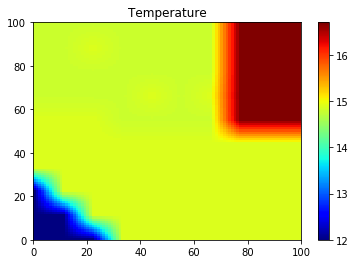

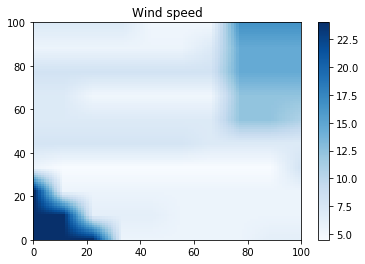

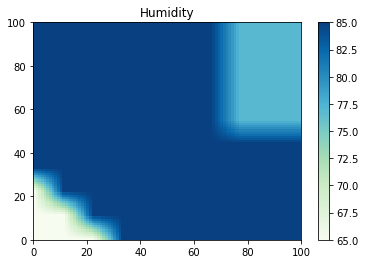

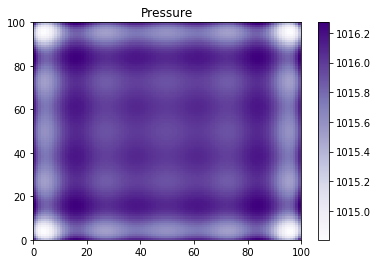

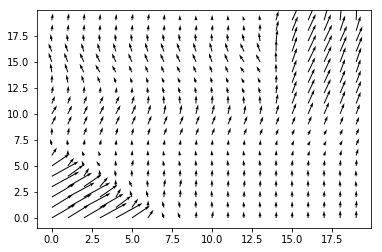

In [9]:
from get_data import plotScalar

In [17]:
# Testing
(M, N) = temperature.shape
wd = np.ones_like(temperature)*0
world = [temperature, wind_speed, wd, humidity, pressure]
initial = fireFocus(M, N, 50, 50, 2)
#neighborhood = 'vonneumann'
neighborhood = 'moore'
alpha = .5
beta = 1-alpha
times = 200
rule = .3

In [18]:
automata = cal.new(initial, world, neighborhood, rule, alpha, beta)
states = automata.propagate(times)

In [19]:
plotStates()

interactive(children=(Play(value=0, description='Press play', max=199), Output()), _dom_classes=('widget-interact',))

* $BT$: Burning trees
* $T$: Temperature

\begin{equation}
    BT_{t+1} = BT_{t} + F(BT_t, T_t, W_t, T_t, P_T)
\end{equation}
\begin{equation}
    T_{t+1} = F_t +  G(BT_t, T_t, W_t, T_t, P_T)
\end{equation}
\begin{equation}
    W_{t+1} = W_t +  I( W_t)
\end{equation}

## Temperature

### Modelo discreto

\begin{equation}
    \begin{split}
        T_{i,j}^{k+1} & = T_{i,j}^k - \frac45 T_{i,j}^k 
            + \frac15\left(T_{i-1,j}^k+T_{i+1,j}^k+T_{i,j-1}^k+T_{i,j+1}^k\right) \\
            & = \frac15\left(T_{i-1,j}^k+T_{i+1,j}^k+T_{i,j}^k+T_{i,j-1}^k+T_{i,j+1}^k\right)
    \end{split}
\end{equation}

In [20]:
def temperatureFocus(M, N):
    x = np.linspace(0, 1, N)
    y = np.linspace(0, 1, M)
    X, Y = np.meshgrid(x, y)
    return 1e3*np.exp(-1000*((X-.5)**2 + (Y-.5)**2))

In [21]:
def plotTemperatures(t=0):
    play = widgets.Play(
        value=0,
        min=0,
        max=len(temps)-1,
        step=1,
        description="Press play",
        disabled=False
    )
    slider = widgets.IntSlider()
    widgets.jslink((play, 'value'), (slider, 'value'))
    widgets.HBox([play, slider])
    widgets.interact(dtemp.plotTemperatures, t=play)

In [25]:
M, N = 100, 100
times = 100
initial = temperatureFocus(M, N)
sigma = 1/30

In [26]:
dtemp = temp.new(initial, sigma)
temps = dtemp.propagate(times)

In [27]:
plotTemperatures()

interactive(children=(Play(value=0, description='Press play', max=99), Output()), _dom_classes=('widget-interact',))

### 